# Predicting how many days a customer will rent a DVD using Machine Learning — Regression

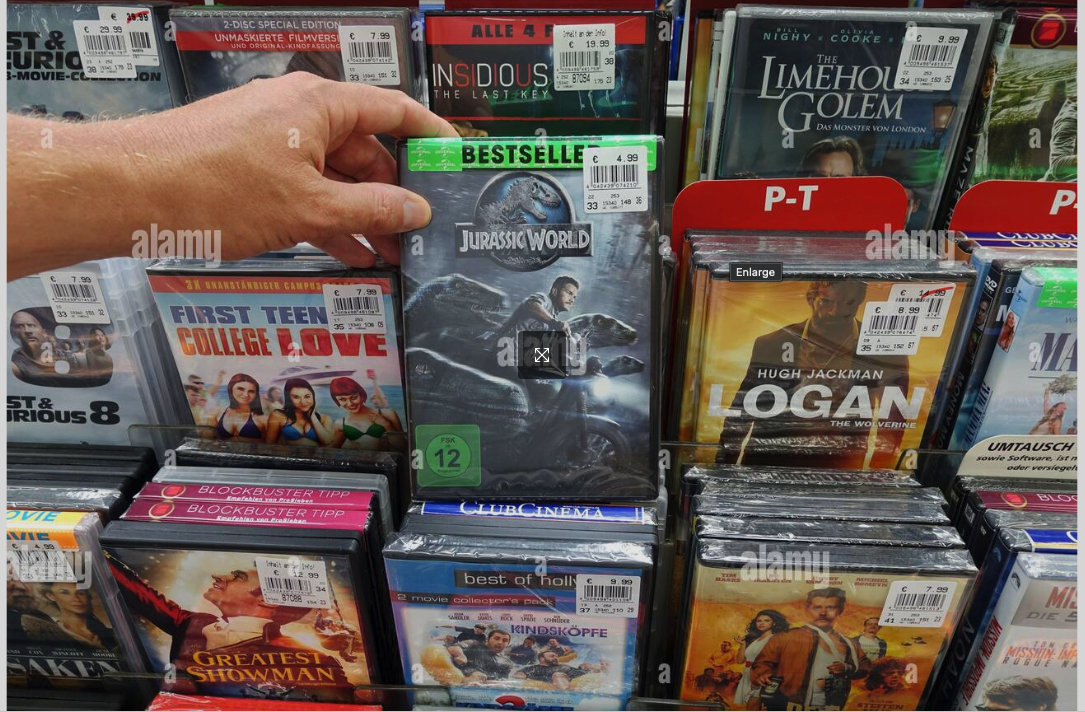

This project aims to figure out how many days a customer will rent a DVD for based on some features. We are going try out some regression models which will help predict the number of days a customer will rent a DVD for using machine learning techniques. Specifically, we are using **regression** machine learning models.

## Data

The data they provided is in the csv file rental_info.csv. It has the following features:

- "rental_date": The date (and time) the customer rents the DVD.
- "return_date": The date (and time) the customer returns the DVD.
- "amount": The amount paid by the customer for renting the DVD.
- "amount_2": The square of "amount".
- "rental_rate": The rate at which the DVD is rented for.
- "rental_rate_2": The square of "rental_rate".
- "release_year": The year the movie being rented was released.
- "length": Lenght of the movie being rented, in minuites.
- "length_2": The square of "length".
- "replacement_cost": The amount it will cost the company to replace the DVD.
- "special_features": Any special features, for example trailers/deleted scenes that the DVD also has.
- "NC-17", "PG", "PG-13", "R": These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.


## Quick Look at the data

In [1]:
import pandas as pd

rentals = pd.read_csv("rental_info.csv", header=0)

rentals.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


It's nice that the ratings are already one-hot encoded(dummy) variables, but we immediately notice that we need to do the same with "special_features". 
Additionally, we will need to convert "rental_date" and "return_date" to a **datetime** data type for easier processing.

In [2]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_date       15861 non-null  object 
 1   return_date       15861 non-null  object 
 2   amount            15861 non-null  float64
 3   release_year      15861 non-null  float64
 4   rental_rate       15861 non-null  float64
 5   length            15861 non-null  float64
 6   replacement_cost  15861 non-null  float64
 7   special_features  15861 non-null  object 
 8   NC-17             15861 non-null  int64  
 9   PG                15861 non-null  int64  
 10  PG-13             15861 non-null  int64  
 11  R                 15861 non-null  int64  
 12  amount_2          15861 non-null  float64
 13  length_2          15861 non-null  float64
 14  rental_rate_2     15861 non-null  float64
dtypes: float64(8), int64(4), object(3)
memory usage: 1.8+ MB


In [3]:
rentals.describe()

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
count,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000
mean,4.217161,2006.885379,2.944101,114.994578,20.224727,0.204842,0.200303,0.223378,0.198726,23.355504,14832.841876,11.389287
std,2.360383,2.025027,1.649766,40.114715,6.083784,0.403599,0.400239,0.416523,0.399054,23.503164,9393.431996,10.005293
min,0.990000,2004.000000,0.990000,46.000000,9.990000,0.000000,0.000000,0.000000,0.000000,0.980100,2116.000000,0.980100
25%,2.990000,2005.000000,0.990000,81.000000,14.990000,0.000000,0.000000,0.000000,0.000000,8.940100,6561.000000,0.980100
50%,3.990000,2007.000000,2.990000,114.000000,20.990000,0.000000,0.000000,0.000000,0.000000,15.920100,12996.000000,8.940100
75%,4.990000,2009.000000,4.990000,148.000000,25.990000,0.000000,0.000000,0.000000,0.000000,24.900100,21904.000000,24.900100
max,11.990000,2010.000000,4.990000,185.000000,29.990000,1.000000,1.000000,1.000000,1.000000,143.760100,34225.000000,24.900100


In [4]:
rentals["special_features"].value_counts()

special_features
{Trailers,Commentaries,"Behind the Scenes"}                     1308
{Trailers}                                                      1139
{Trailers,Commentaries}                                         1129
{Trailers,"Behind the Scenes"}                                  1122
{"Behind the Scenes"}                                           1108
{Commentaries,"Deleted Scenes","Behind the Scenes"}             1101
{Commentaries}                                                  1089
{Commentaries,"Behind the Scenes"}                              1078
{Trailers,"Deleted Scenes"}                                     1047
{"Deleted Scenes","Behind the Scenes"}                          1035
{"Deleted Scenes"}                                              1023
{Commentaries,"Deleted Scenes"}                                 1011
{Trailers,Commentaries,"Deleted Scenes","Behind the Scenes"}     983
{Trailers,Commentaries,"Deleted Scenes"}                         916
{Trailers,"Delete

As you can see, this attribute has a non-tabular form. Since most ML algortithms prefer numerical values, we will have to convert these categories of special features into numerical values.
Additionally, since there is no logical or hierarchical difference between the different types of special features, we will use **one-hot encoding** in order to make sure the model won't interpret any hierarchical significance between the numerical transformations of our "special_feature" values. The special features attribute looks list it contains lists. Let's dive deeper into it.


In [5]:
# One-hot encoding. Multiple variables. Dummy variables. 
import numpy as np
rentals["trailers"] = np.where(rentals["special_features"].str.contains("Trailers"), 1, 0)
rentals["behind_the_scenes"] = np.where(rentals["special_features"].str.contains("Behind the Scenes"), 1, 0)
rentals["deleted_scenes"] = np.where(rentals["special_features"].str.contains("Deleted Scenes"), 1, 0)

rentals["deleted_scenes"] = np.where(rentals["special_features"].str.contains("Deleted Scenes"), 1, 0)

A raw datetime value alone provides limited insight. To extract meaningful patterns, it's important to derive features such as seasonality and time of day.

In [6]:
# Clean the time series data.
rental_date = pd.to_datetime(rentals["rental_date"])
return_date = pd.to_datetime(rentals["return_date"])

rentals["rental_month"] = rental_date.dt.month
rentals["rental_day_of_week"] = rental_date.dt.dayofweek
rentals["rental_hour"] = rental_date.dt.hour
rentals["rental_days"] = (return_date - rental_date).dt.total_seconds() / (24 * 60 * 60)

# Drop columns
rentals_num = rentals.drop(["rental_date", "return_date", "special_features"], axis=1)

## Data Vizualization

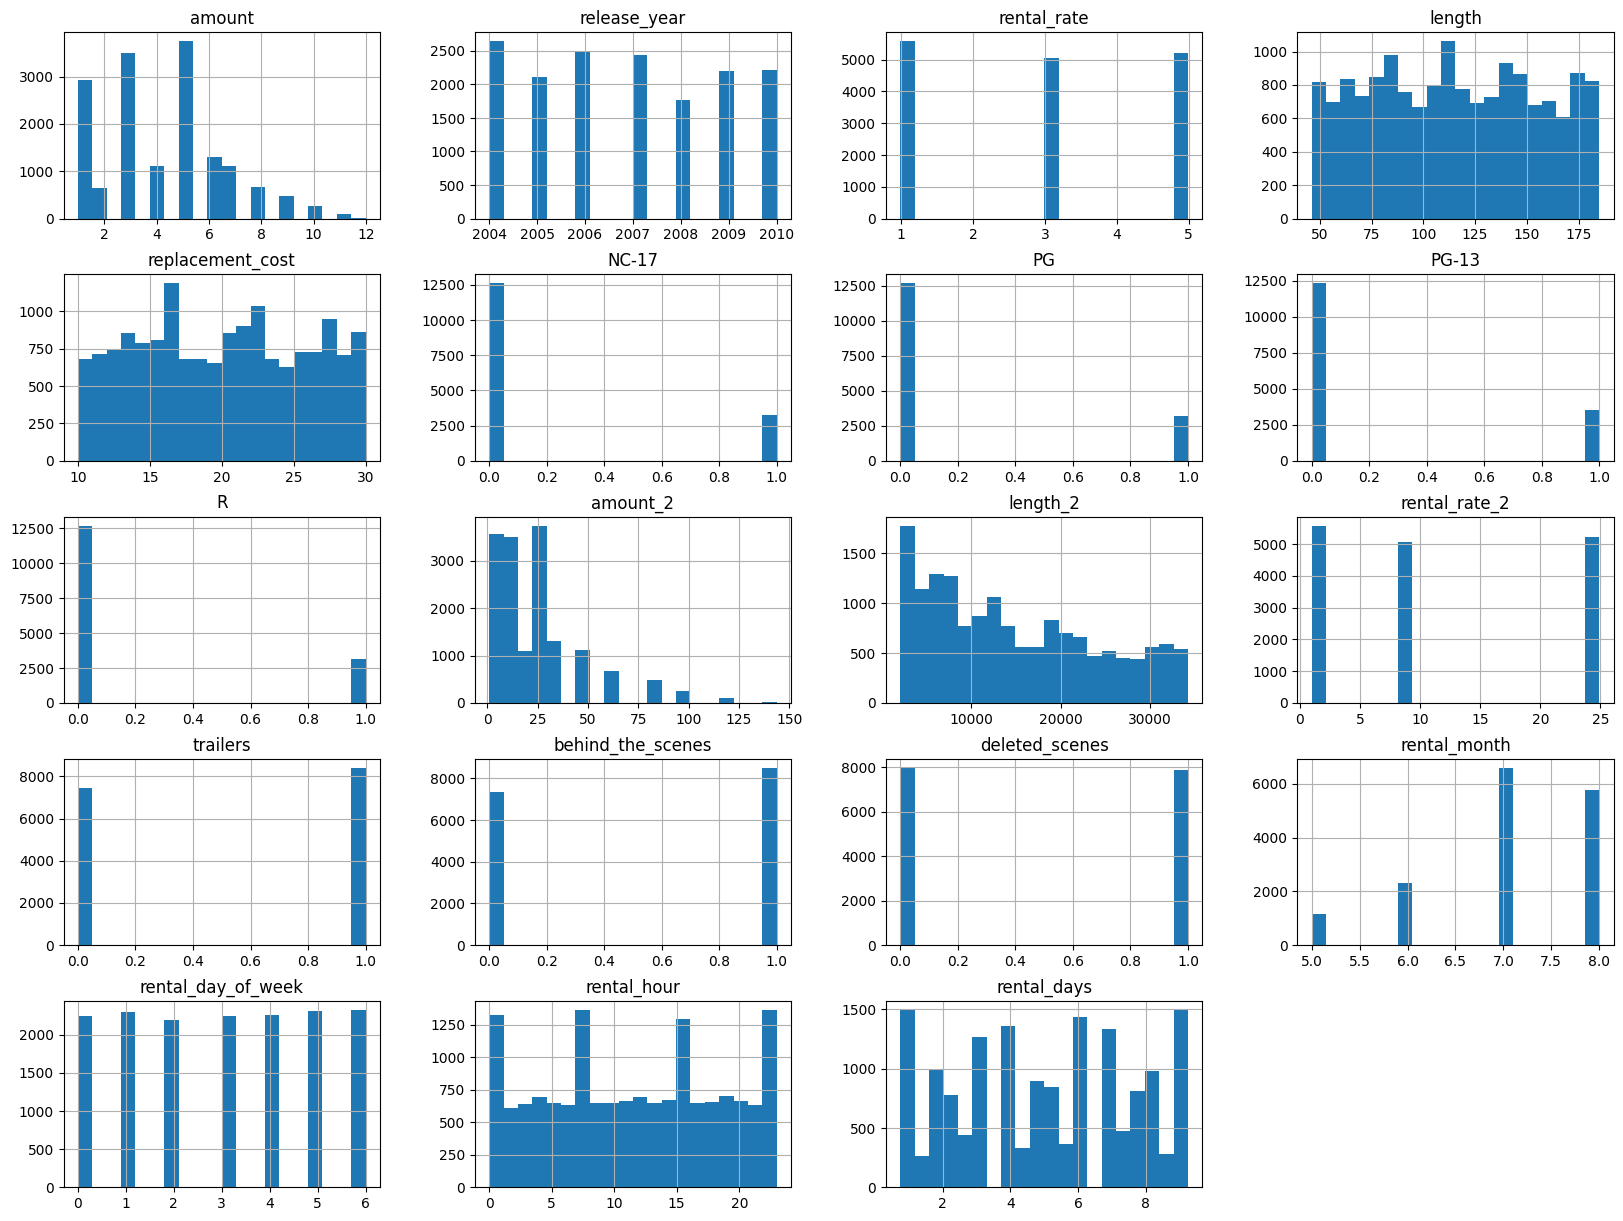

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

rentals_num.hist(bins=20, figsize=(20, 15))

plt.show()

- We noticed that they are three fixed rental rates.
- Most of these attributes have different scales. e.g. years are a harmonic sequence, ratings are booleans, while other attributes take on a wide range of values. 
We will need to do some **feature scaling**.
- Also the "amount_2" and "length_2" distribution is taily-heavy i.e. It extends too much to the right. This is bad since it can make our models biased. We will need to take care of this with **Feature Scaling**. Specifically, we will need to do **z-score standardization with ScikitLearn's StandardScaler**.
- Among other important deductions, we see that the movies' ratings are distributed almost equally throughout the four categories. "NC=17", "PG", "PG-13", and "R".
Now let's plot the data on a histogram to get a visual image of our dataset. 
Consequently, we will need to transform this distribution to take a more bell-shaped form.


## Linear Correlations of our attributes with our target "rental_days" 

In [8]:
correlation_matrix = rentals_num.corr()
correlation_matrix["rental_days"].sort_values(ascending=False)

rental_days           1.000000
amount                0.557351
amount_2              0.554728
replacement_cost      0.017151
rental_day_of_week    0.011971
PG-13                 0.010970
rental_month          0.008389
release_year          0.006782
behind_the_scenes     0.000201
NC-17                -0.000095
rental_rate          -0.001727
rental_rate_2        -0.001742
trailers             -0.001795
deleted_scenes       -0.002530
rental_hour          -0.003167
length               -0.004701
length_2             -0.004773
PG                   -0.007371
R                    -0.009934
Name: rental_days, dtype: float64

We observe that 'amount' and 'amount_2' exhibit strong correlations with 'rental_days'. However, we cannot discard the other attributes, as their relationships with 'rental_days' may be nonlinear and still contribute valuable predictive power.

## train-test split: Splitting the training set fron the test set.

In [9]:
from sklearn.model_selection import train_test_split

X = rentals_num.drop(["rental_days"], axis=1)
y = rentals_num["rental_days"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Pipelining

In [10]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
   ])

X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)

## Model selection and training

### 1. Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

line_reg_predictions = lin_reg.predict(X_train_prepared)

### 2. Decision Tree Regression

In [12]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_prepared, y_train)
tree_reg_predictions = tree_reg.predict(X_train_prepared)

### 3. Ensemble learning: RandomForestRegressor()

In [13]:
from sklearn.ensemble import RandomForestRegressor

random_reg = RandomForestRegressor()
random_reg.fit(X_train_prepared, y_train)


RandomForestRegressor()

## Validating the models

### 1. RMSE Validation

In [14]:
from sklearn.metrics import mean_squared_error

def get_rmse(labels, predictions):
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    return rmse

line_reg_rmse = get_rmse(y_train, line_reg_predictions) 
print("Linear regression RMSE: ", line_reg_rmse)

tree_reg_rmse = get_rmse(y_train, tree_reg_predictions) 
print("Decision Tree regression RMSE: ", tree_reg_rmse)

random_reg_rmse = get_rmse(y_train, tree_reg_predictions) 
print("Random Forest regression RMSE: ", random_reg_rmse)

Linear regression RMSE:  1.632673663020008
Decision Tree regression RMSE:  0.10970749008225356
Random Forest regression RMSE:  0.10970749008225356


The Linear Regression model yields an RMSE of approximately 1.63, indicating limited accuracy. In contrast, both the Decision Tree and Random Forest models achieve much lower RMSE values (~0.11), which suggests potential overfitting, especially given their near-identical performance on the training set.

### 2. K-fold Cross validation
To better assess model performance and generalizability, we will use k-fold cross-validation. Unlike a single RMSE score on the training or test set, k-fold splits the data into k sets, and experiments k times, using each set as a test set once, and using the remaining data as the training set.

In [103]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, X_train_prepared, y_train, scoring="neg_root_mean_squared_error", cv=10)
tree_scores = cross_val_score(tree_reg, X_train_prepared, y_train, scoring="neg_root_mean_squared_error", cv=10)
random_scores = cross_val_score(random_reg, X_train_prepared, y_train, scoring="neg_root_mean_squared_error", cv=10)

def display_scores(scores):
    rmse_scores = -scores
    print(f"Mean RMSE: {rmse_scores.mean():.4f}")
    print(f"Standard deviation: {rmse_scores.std():.4f}\n")

print("Linear Regression validation scores")
display_scores(lin_scores)

print("Decision Tree Regression validation scores")
display_scores(tree_scores)

print("Random Forest Regression validation scores")
display_scores(random_scores)

Linear Regression validation scores
Mean RMSE: 1.6349
Standard deviation: 0.0154

Decision Tree Regression validation scores
Mean RMSE: 1.9119
Standard deviation: 0.0478

Random Forest Regression validation scores
Mean RMSE: 1.4258
Standard deviation: 0.0283



Based on the results so far, the Random Forest model is performing the best. Next, we'll evaluate the performance of differnt models packed together. This is called **Ensemble Learning** and we will be using **XGBoost** model to see if it can outperform the Random Forest model. 

### Ensemble Learning: XGBoost

In [104]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=9)
xgb_scores = cross_val_score(xgb_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)

print("XGBoost Regression validation scores")
display_scores(xgb_scores)

XGBoost Regression validation scores
Mean RMSE: 1.4727
Standard deviation: 0.0185



Although XGBoost shows promise, it hasn’t yet surpassed our best Random Forest. 

## Fine-tuning

### 1. Grid Search 

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

grid_search = GridSearchCV(random_reg, param_grid, cv=10, scoring="neg_root_mean_squared_error", return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [51]:
def print_cv_results(results):
    for mean_test_score, params in zip(results["mean_test_score"], results["params"]):
        print(-mean_test_score, params)

print_cv_results(grid_search.cv_results_)

1.7784955369735578 {'max_features': 2, 'n_estimators': 3}
1.565954878787187 {'max_features': 2, 'n_estimators': 10}
1.497156606742252 {'max_features': 2, 'n_estimators': 30}
1.6631584374021038 {'max_features': 4, 'n_estimators': 3}
1.4851400402616688 {'max_features': 4, 'n_estimators': 10}
1.4451918024541555 {'max_features': 4, 'n_estimators': 30}
1.6468958661134274 {'max_features': 6, 'n_estimators': 3}
1.48684936977835 {'max_features': 6, 'n_estimators': 10}
1.4426861113820615 {'max_features': 6, 'n_estimators': 30}
1.6484850850572883 {'max_features': 8, 'n_estimators': 3}
1.4835288387343364 {'max_features': 8, 'n_estimators': 10}
1.4371149608873952 {'max_features': 8, 'n_estimators': 30}
1.7545405504438794 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1.5675515863918592 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1.6806638914424117 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1.5348908391234708 {'bootstrap': False, 'max_features': 3, 'n_est

Interestingly, the fine-tuned Random Forest model did not outperform our earlier results. Despite exploring a range of hyperparameters using GridSearchCV, the best model performed slightly worse. Let's try a different search strategy to unlock its full potential.

### 2. Randomized Search

In [68]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 3, 4, 6, 8],
    "bootstrap": [True, False]
}

random_search = RandomizedSearchCV(random_reg, param_grid, cv=10, scoring="neg_root_mean_squared_error", return_train_score=True)
random_search.fit(X_train_prepared, y_train)
print_cv_results(random_search.cv_results_)

1.2171986596786135 {'n_estimators': 10, 'max_features': 8, 'bootstrap': True}
1.2118564292265621 {'n_estimators': 30, 'max_features': 4, 'bootstrap': False}
1.2168487548182652 {'n_estimators': 10, 'max_features': 6, 'bootstrap': True}
1.2300125994769944 {'n_estimators': 10, 'max_features': 8, 'bootstrap': False}
1.2284539677020467 {'n_estimators': 30, 'max_features': 2, 'bootstrap': False}
1.2992804069245283 {'n_estimators': 3, 'max_features': 3, 'bootstrap': True}
1.2177021861190678 {'n_estimators': 30, 'max_features': 3, 'bootstrap': False}
1.2136784292366916 {'n_estimators': 30, 'max_features': 8, 'bootstrap': False}
1.2744770461715718 {'n_estimators': 3, 'max_features': 6, 'bootstrap': True}
1.2301649638008305 {'n_estimators': 10, 'max_features': 4, 'bootstrap': False}


The Random Forest fine-tuning results show varied performance depending on the hyperparameter combinations. Although some configurations approach good RMSE values, the results suggest that the model’s performance is quite sensitive to the choice of parameters. The best RMSE here is around 1.48, which is close but not consistently better than the untuned baseline. Next, let's compare all models side by side.

## Model Performance comparison

In [ ]:
grid_search_scores = cross_val_score(grid_search.best_estimator_, X_train_prepared, y_train, scoring="neg_root_mean_squared_error", cv=10)
random_search_scores = cross_val_score(random_search.best_estimator_, X_train_prepared, y_train, scoring="neg_root_mean_squared_error", cv=10)

In [126]:
lin_rmse_scores = -lin_scores
tree_rmse_scores = -tree_scores
random_rmse_scores = -random_scores
xgb_rmse_scores = -xgb_scores
grid_search_rmse_scores = -grid_search_scores
random_search_rmse_scores = -random_search_scores

mean_rmse = [lin_rmse_scores.mean(), tree_rmse_scores.mean(), random_rmse_scores.mean(),
             xgb_rmse_scores.mean(), grid_search_rmse_scores.mean(), random_search_rmse_scores.mean()]

std_dev = [lin_rmse_scores.std(), tree_rmse_scores.std(), random_rmse_scores.std(),
           xgb_rmse_scores.std(), grid_search_rmse_scores.std(), random_search_rmse_scores.std()]

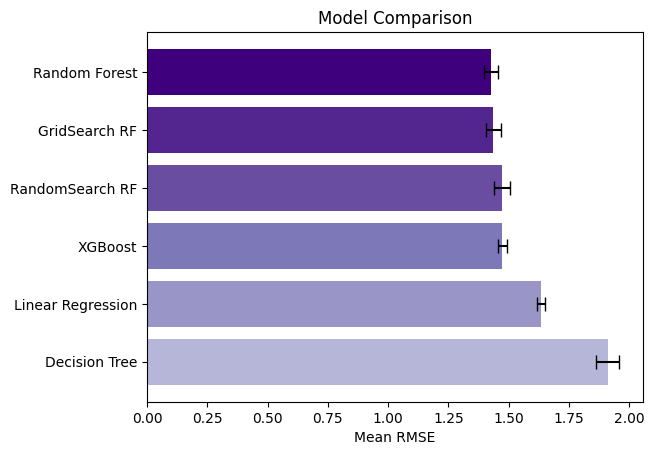

In [152]:
import matplotlib.cm as colormap
# Sort by mean_rmse ascending
df = pd.DataFrame({
    'model': models,
    'mean_rmse': mean_rmse,
    'std_dev': std_dev,
})

df_sorted = df.sort_values('mean_rmse')

# Pick a color distribution
cmap = colormap.Purples
colors = cmap(np.linspace(0.4, 1, len(models)))
colors = list(reversed(colors))


# Plot
plt.barh(df_sorted['model'], df_sorted['mean_rmse'], xerr=df_sorted['std_dev'], capsize=5, color=colors)
plt.gca().invert_yaxis()  # Best at top
plt.xlabel('Mean RMSE')
plt.title('Model Comparison')
plt.show()

Unfortunately, despite the applied optimizations, the best-performing  remains the pre-tuned Random Forest. Given the increased computational cost without a corresponding performance gain, we consider this result satisfactory for now.

## Analyzing feature importance in our prediciton

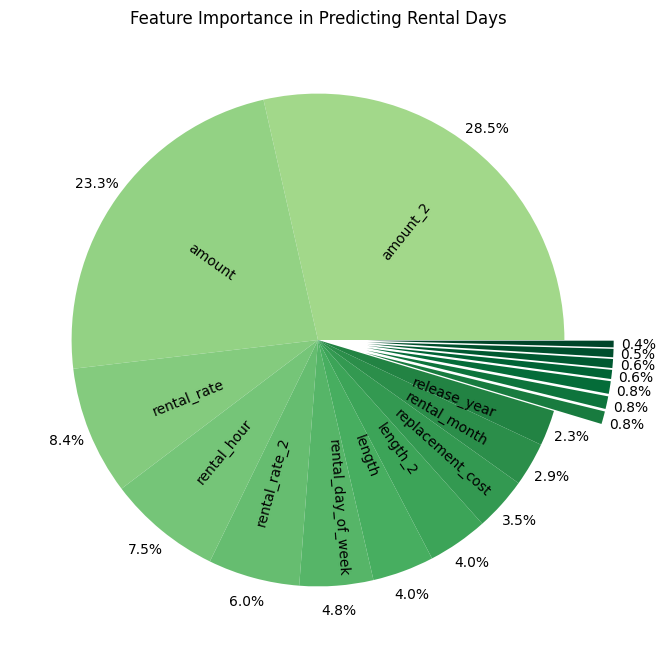

In [228]:
feature_importances = random_search.best_estimator_.feature_importances_
data = sorted(zip(feature_importances, pipeline.get_feature_names_out()), reverse=True)
data_sorted = sorted(data, key=lambda x: x[0], reverse=True)
importances, features = zip(*data_sorted)

cmap = colormap.YlGn
colors = cmap(np.linspace(0.4, 1, len(data)))

explode = [0.2 if v < 0.01 else 0 for v in importances]
labels = [feature if explode_val == 0 else "" for feature, explode_val in zip(features, explode)]

plt.figure(figsize=(8, 8))
plt.pie(importances, labels=labels, colors=colors, autopct=lambda x: f"{x:.1f}%", labeldistance=0.4,
        pctdistance=1.1, rotatelabels=True, explode=explode)


plt.title("Feature Importance in Predicting Rental Days")
plt.show()

## Evaluating our system on Test Set

In [231]:
final_model = random_reg

final_predictions = final_model.predict(X_test_prepared)

final_rmse = get_rmse(y_test, final_predictions)
final_rmse

np.float64(1.409422020084662)

In [232]:
def days_to_dhms(days):
    total_seconds = days * 24 * 60 * 60
    
    hours = (total_seconds // (60 * 60)) % 24
    days = total_seconds // (24 * 60 * 60)
    
    return int(days), int(hours)
    
days, hours = days_to_dhms(final_rmse)
print(f"The final RMSE is {days} days, {hours} hours.")

The final RMSE is 1 days, 9 hours.


Our final model’s RMSE of **1 day and 9 hours** on unseen test data is a strong sign that it has good generalization ability.

### How precise is this estimate? Let's compute the 95% confidence interval for the generalization error

In [233]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2

ci = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

In [234]:
lower_days, lower_hours = days_to_dhms(ci[0])
upper_days, upper_hours = days_to_dhms(ci[1])

print(f"95% confidence interval: from {lower_days} days, {lower_hours} hours to {upper_days} days, {upper_hours} hours.")


95% confidence interval: from 1 days, 8 hours to 1 days, 10 hours.
